# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
img=cv2.imread(os.path.join('data','happy','154006829.jpg'))

In [10]:
img.shape

(3744, 5616, 3)

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

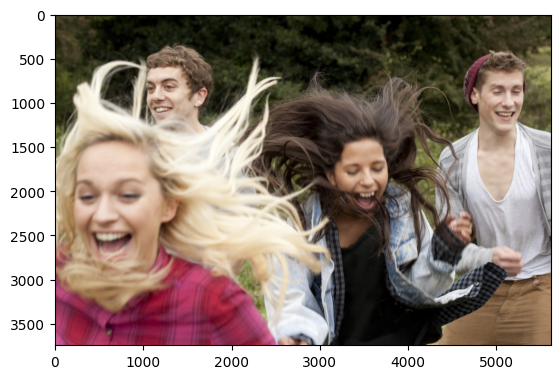

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [30]:
#images + labels
batch = data_iterator.next()

In [29]:
b=data_iterator.next()
b

(array([[[[1.85500000e+02, 1.36076172e+02, 5.12167969e+01],
          [1.51304688e+02, 1.12351562e+02, 3.25214844e+01],
          [1.39181641e+02, 1.05275391e+02, 3.09238281e+01],
          ...,
          [1.35593750e+02, 1.07992188e+02, 1.26953125e-01],
          [1.18423828e+02, 9.28730469e+01, 0.00000000e+00],
          [1.54974609e+02, 1.14097656e+02, 5.41992188e+00]],
 
         [[1.86228516e+02, 1.36945312e+02, 3.34433594e+01],
          [1.59740234e+02, 1.18304688e+02, 2.13457031e+01],
          [1.53544922e+02, 1.11109375e+02, 2.60859375e+01],
          ...,
          [1.20726562e+02, 9.24882812e+01, 2.19531250e+00],
          [1.17695312e+02, 8.84667969e+01, 0.00000000e+00],
          [1.55423828e+02, 1.12923828e+02, 1.21679688e+00]],
 
         [[1.85003906e+02, 1.37761719e+02, 1.24687500e+01],
          [1.67789062e+02, 1.21904297e+02, 6.86132812e+00],
          [1.64142578e+02, 1.14630859e+02, 6.44531250e+00],
          ...,
          [1.11087891e+02, 8.80000000e+01, 7.3828

In [17]:
#class 1 =SAD and 0=Happy
batch[1]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

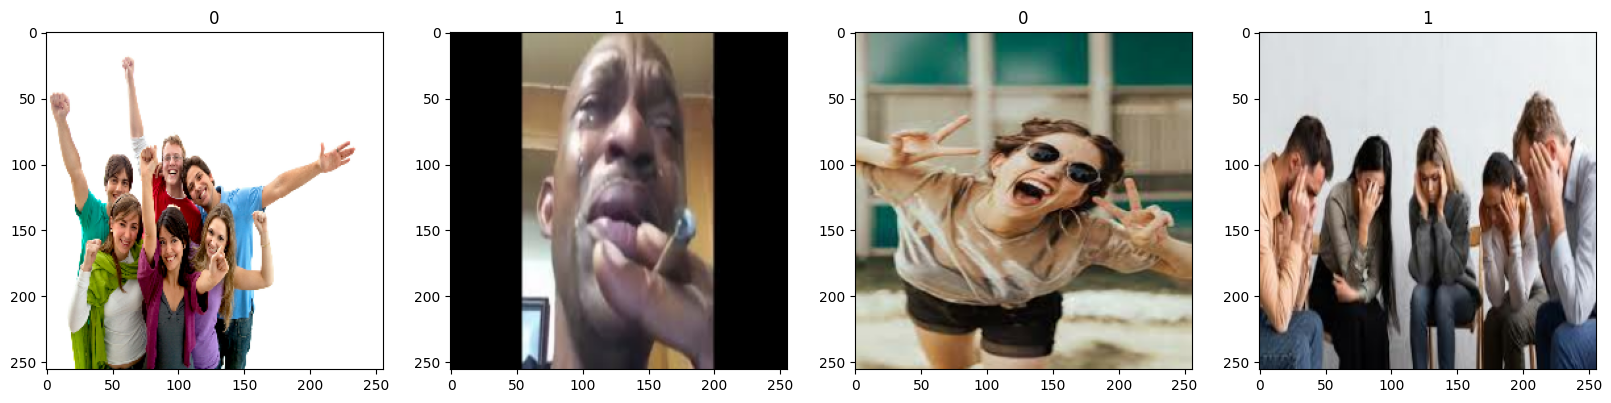

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
batch[0].max()

255.0

# 4. Scale Data

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[2.94117659e-01, 3.13725501e-01, 2.90196091e-01],
          [2.94791669e-01, 3.14399511e-01, 2.90870100e-01],
          [2.97855407e-01, 3.17463249e-01, 2.93933809e-01],
          ...,
          [3.56678933e-01, 3.44914228e-01, 3.09620112e-01],
          [3.53615195e-01, 3.41850489e-01, 3.06556374e-01],
          [3.52941185e-01, 3.41176480e-01, 3.05882365e-01]],
 
         [[2.94791669e-01, 3.13725501e-01, 2.89859056e-01],
          [2.95436710e-01, 3.14370543e-01, 2.90504128e-01],
          [2.98368812e-01, 3.17302614e-01, 2.93436199e-01],
          ...,
          [3.55652094e-01, 3.44416589e-01, 3.08946073e-01],
          [3.52325082e-01, 3.41484517e-01, 3.05882365e-01],
          [3.51593137e-01, 3.40839475e-01, 3.05208325e-01]],
 
         [[2.97855407e-01, 3.13725501e-01, 2.88327217e-01],
          [2.98368812e-01, 3.14238906e-01, 2.88840622e-01],
          [3.00702512e-01, 3.16572607e-01, 2.91174322e-01],
          ...,
          [3.50984693e-01, 3.42154711e-01, 3.0588

# 5. Split Data

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

7

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [26]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 15s 1s/step - loss: 1.0310 - accuracy: 0.4688 - val_loss: 0.8681 - val_accuracy: 0.4375
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.7044 - accuracy: 0.5268 - val_loss: 0.6800 - val_accuracy: 0.4844
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.6532 - accuracy: 0.6920 - val_loss: 0.5912 - val_accuracy: 0.7188
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.5978 - accuracy: 0.7277 - val_loss: 0.5173 - val_accuracy: 0.7188
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.5202 - accuracy: 0.7143 - val_loss: 0.4713 - val_accuracy: 0.6562
Epoch 6/20
7/7 [==============================] - 11s 1s/step - loss: 0.3869 - accuracy: 0.8170 - val_loss: 0.2296 - val_accuracy: 0.9531
Epoch 7/20
7/7 [==============================] - 11s 1s/step - loss: 0.3057 - accuracy: 0.8750 - val_loss: 0.2358 - val_accuracy: 0.9062
Epoch 8/20
7/7 [==================

# 8. Plot Performance

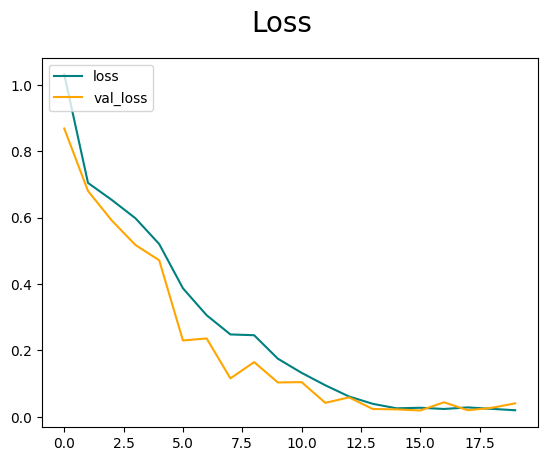

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

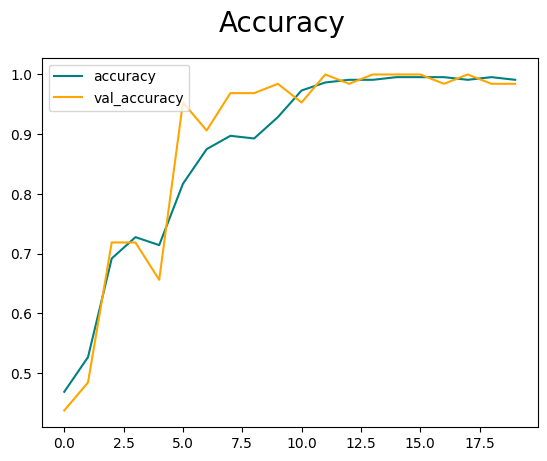

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [41]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [50]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 0.875 0.9411765


# 10. Test

In [45]:
import cv2

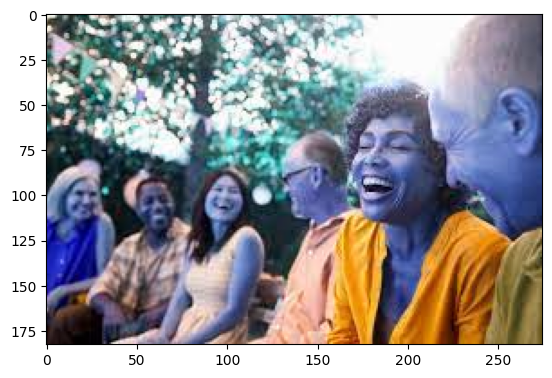

In [110]:
img = cv2.imread('E:\college\projects\ImageClassification\ImageClassification-main\happy.jpeg')
plt.imshow(img)
plt.show()

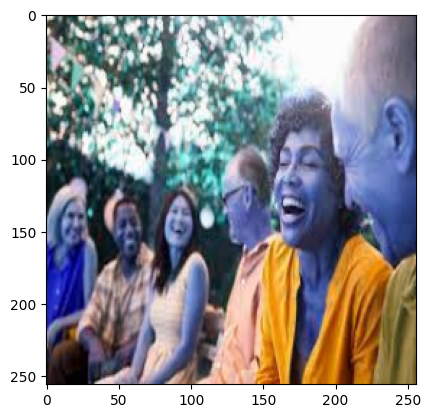

In [111]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [112]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [113]:
yhat

array([[0.0018996]], dtype=float32)

In [114]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [115]:
from keras.models import load_model

In [117]:
model.save(os.path.join('models','imgclassmodel.h5'))

In [121]:
new_model = load_model(os.path.join('models','imgclassmodel.h5'))

In [122]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.0018996]], dtype=float32)